# t distributions

In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

Suppose we have some population that we know is normally distributed. For now let's suppose we know the standard deviation, but **the is not generally the case.**

In [2]:
sd = 3
pop = stats.norm(0, sd)
sample_size = 5

Suppose we take a (smallish) sample from we want to whether the mean if the original distribution is greater than zero. In order to do null-hypothesis significance testing, we need to compare a test statistic to a specific distribution, and calculate the p-value based on the probability the test statistic would be greater than or equal to the value we saw under the null distribution.

Now if we know the standard deviation to be 1, this is easy. Under the central limit theorem, the mean of the distribution is distribution is distribution normally with a standard error of the original standard deviation divided by the sample size.

Alternatively, if we divide those means by the standard error, they should be distributed like $N(0, 1)$

Let's confirm all that. First, we'll take a bunch of small samples from it.

In [3]:
n_samples = 100000
samples = pop.rvs((n_samples, sample_size))
means = samples.mean(axis=1)
scaled_means = means / (sd/np.sqrt(sample_size))

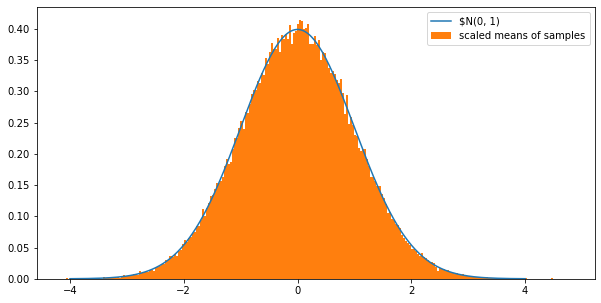

In [4]:
fig, ax = plt.subplots(figsize=(10,5))
xpts = np.linspace(-4, 4, 250)
ax.plot(xpts, stats.norm(0, 1).pdf(xpts), label='$N(0, 1)')
ax.hist(scaled_means, bins=250, density=True, label='scaled means of samples')
ax.legend();

They match!

The problem is, we don't actually know the standard deviation pf the population.

What if we tried using the standard deviation of each sample instead? We'll use the unbiased estimate for the standard deviation (the one with n-1 in the denominator, so `ddof=1`) because, we, that's what statisticians do a lot.

In [5]:
standard_deviations = samples.std(axis=1, ddof=1)
sample_scaled_means = means / (standard_deviations/np.sqrt(sample_size))

(-10, 10)

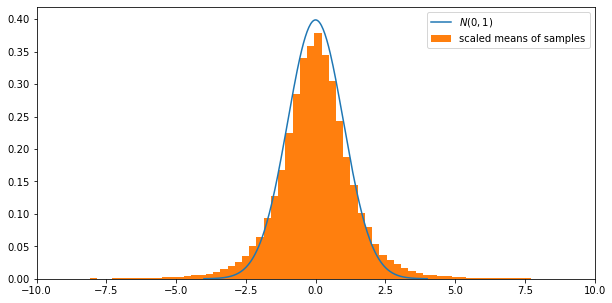

In [6]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(xpts, stats.norm(0, 1).pdf(xpts), label='$N(0, 1)$')
ax.hist(sample_scaled_means, bins=250, density=True, label='scaled means of samples')
ax.legend();
ax.set_xlim(-10, 10)

Those clearly don't match; the tails are a lot heavier that a normal distribution. That's because for a small sample there's a good chance that the points are all near enough together that the standard deviation is small, so the scaled mean becomes really big.

It turns out that there is a distribution that fits that that, called a **t distribution**. It doesn't use location or scale parameters, but does have a parameter called **degrees of freedom**. The mean of a sample of size $n$ taken normal distribution, divided by the unbiased standard deviation of that sample, will be distributed according to a t distribution, with degrees of freedom of $n - 1$.


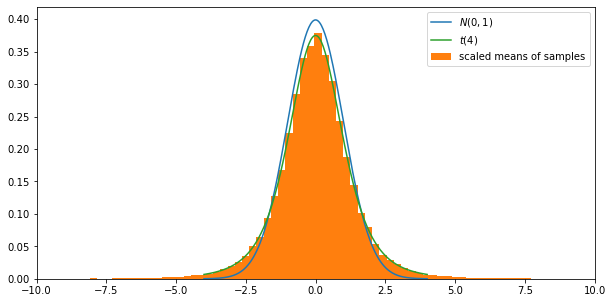

In [7]:
degrees_of_freedom = sample_size - 1
ax.plot(xpts, stats.t(df=degrees_of_freedom).pdf(xpts), label=f'$t({degrees_of_freedom})$')
ax.legend()
ax.set_xlim(-10, 10)
fig

Back to the original point. If we have a sample from a normal distribution of unknown variance, and want to do NHST, with the null hypothesis that the mean is zero, then we can use the mean divided but the unbiased sample variance as a test statistic, and use the quantile function of the t distribution to calculate p-values. Such a test is called a **t test**.

Note that there are more complicated t tests, comparing data from different populations. These involve creating the test statistic somehow that turns out to be t distributed.

Note also that all this has a pretty strong requirement that the data comes from a normal distribution. If this isn't the case (and it usually isn't) you should use some other test, generally a non-parametric test.